## 1st: STORE SELECTION

General objective reminder:  "Use anonymized data on households' groceries over 8 weeks to predict which previously purchased products will be in the households' 9th week groceries."

WHAT COULD WE ACHIEVE WITH AI VS. WHAT IS LOST FROM THE ACTUAL REAL WORLD?

### Import libraries 

In [1]:
#Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import dataframe_image as dfi

from matplotlib.ticker import StrMethodFormatter

### Load and view data 

In [2]:
# read_file = pd.read_excel (open (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\Groceries sorted\DATA GROCERIES-forpredict(HH1-5).xlsx", 'rb'), sheet_name='H3 (2; 1M&1F-suburban)')
# read_file.to_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\Groceries sorted\DATA GROCERIES-forpredict(hh3).csv", index = None, header=True)

In [24]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\Groceries sorted\DATA GROCERIES-forpredict(hh3).csv")

del df["HH"]
df.describe(include='all')

,week,order_ID,item_id,amount,price_unit,price_total,item_type,category,day,time,store_type,store_name,promo
count,266.000000,266.000000,266,266.000000,266.000000,266.000000,266,266,266,266,266,266,266.000000
unique,NaN,NaN,219,NaN,NaN,NaN,108,15,6,4,3,8,NaN
top,NaN,NaN,BONI brood keizer 6x50g,NaN,NaN,NaN,sandwiches,bakery,Wednesday,evening,supermarket,Colruyt,NaN
freq,NaN,NaN,5,NaN,NaN,NaN,17,42,91,168,250,154,NaN
mean,4.706767,9.112782,NaN,1.338346,2.285553,2.645734,NaN,NaN,NaN,NaN,NaN,NaN,0.018797
std,2.551454,5.116240,NaN,1.218643,2.672999,2.927494,NaN,NaN,NaN,NaN,NaN,NaN,0.136063
min,1.000000,1.000000,NaN,1.000000,0.193120,0.193120,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2.000000,4.000000,NaN,1.000000,0.990000,1.190000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,5.000000,10.000000,NaN,1.000000,1.655000,1.890000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,7.000000,12.000000,NaN,1.000000,2.592940,2.990000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [25]:
print("Null values")
display(df.isnull().sum()/len(df))

Null values


week           0.0
order_ID       0.0
item_id        0.0
amount         0.0
price_unit     0.0
price_total    0.0
item_type      0.0
category       0.0
day            0.0
time           0.0
store_type     0.0
store_name     0.0
promo          0.0
dtype: float64

## Recode variables

In [26]:
# new row for reordered items 
df['reorder'] = df.item_type.duplicated()

# convert reorder row to boolean value
df['reorder'] = df['reorder'].astype(bool)


#create an ID for each item 
df.rename(columns={'item_id':'item_name'}, inplace=True)
df['item_id'] = pd.factorize(df['item_name'])[0]

#create an ID for each type 
df['type_id'] = pd.factorize(df['item_type'])[0]


#first make a new column for the amount of items per order
df['order_amount'] = df.groupby('order_ID')['amount'].transform('sum')

# make a new column for the price per order
df['order_price'] = df.groupby('order_ID')['price_total'].transform('sum')

In [27]:
df['week'] = df['week'].astype(int)

df['order_ID'] = df['order_ID'].astype(int)

df['amount'] = df['amount'].astype(int)

df['promo'] = df['promo'].astype(bool)

df['item_id'] = df['item_id'].astype(int)

df['type_id'] = df['type_id'].astype(int)

week              int32
order_ID          int32
item_name        object
amount            int32
price_unit      float64
price_total     float64
item_type        object
category         object
day              object
time             object
store_type       object
store_name       object
promo              bool
reorder            bool
item_id           int32
type_id           int32
order_amount      int64
order_price     float64
dtype: object

In [28]:
df_des = df.describe(include='all')

df_styled = df_des.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled,"describeHH3.png")

## Correlation Matrix

In [29]:
# Recode day

def day_to_numeric(x):
    if x=='Monday': return 1
    if x=='Tuesday':   return 2
    if x=='Wednesday':   return 3
    if x=='Thursday':   return 4
    if x=='Friday':   return 5
    if x=='Saturday':   return 6   
    if x=='Sunday':   return 7    
    
df['day_num'] = df['day'].apply(day_to_numeric)

In [30]:
# Recode store_type

def storetype_to_numeric(x):
    if x=='supermarket': return 1
    if x=='butcher':   return 2
    if x=='bakery':   return 3
    if x=='furniture store': return 4
    if x=='drugstore': return 5
    if x=='pet supplies': return 6
    if x=='minimarket': return 7

df['storetype_num'] = df['store_type'].apply(storetype_to_numeric)

In [31]:
# Recode store_name

def storename_to_numeric(x):
    if x=='Carrefour': return 1
    if x=='Okay':   return 2
    if x=='Albert Heijn':   return 3
    if x=='Delhaize':   return 4
    if x=='Sys':   return 5
    if x=='Brabo':   return 6
    if x=='Versavel Poelman':   return 7
    if x=='Ikea':   return 8
    if x=='Kruidvat':   return 9
    if x=='Aldi':   return 10
    if x=='Vanessa':   return 11
    if x=='Tine':   return 12
    if x=='Food Factory':   return 13
    if x=='Maxi Zoo':   return 14
    if x=='MCD':   return 15
    if x=='De Pers':   return 16
    if x=='Jumbo':   return 17
    if x=='Colruyt':   return 18
    if x=='Spar':   return 19

df['storename_num'] = df['store_name'].apply(storename_to_numeric)

In [32]:
# Recode time

def time_to_numeric(x):
    if x=='morning': return 1
    if x=='noon':   return 2
    if x=='afternoon':   return 3
    if x=='evening':   return 4


df['time_num'] = df['time'].apply(time_to_numeric)

In [33]:
# Recode categories

def cat_to_numeric(x):
    if x=='nuts, seeds & dried fruit': return 1
    if x=='bakery':   return 2
    if x=='bakery ':   return 2
    if x=='beverages':   return 3
    if x=='dairy & plant based':   return 4
    if x=='breakfast & spreads':   return 5
    if x=='snacks':   return 6
    if x=='non-food':   return 7
    if x=='fruit & vegetables':   return 8
    if x=='meat, fish & veggie':   return 9
    if x=='cooking aids':   return 10
    if x=='cooking aid':   return 10
    if x=='canned foods':   return 11
    if x=='household':   return 12
    if x=='condiments':   return 13
    if x=='care & hygiene':   return 14
    if x=='care & hyygiene':   return 14
    if x=='frozen foods':   return 15
    if x=='pasta & rice':   return 16
    

df['cat_num'] = df['category'].apply(cat_to_numeric)

In [34]:
df['time_num'] = df['time_num'].astype(int)

df['day_num'] = df['day_num'].astype(int)

df['cat_num'] = df['cat_num'].astype(int)

df['storename_num'] = df['storename_num'].astype(int)

df['storetype_num'] = df['storetype_num'].astype(int)

df.dtypes

week               int32
order_ID           int32
item_name         object
amount             int32
price_unit       float64
price_total      float64
item_type         object
category          object
day               object
time              object
store_type        object
store_name        object
promo               bool
reorder             bool
item_id            int32
type_id            int32
order_amount       int64
order_price      float64
day_num            int32
storetype_num      int32
storename_num      int32
time_num           int32
cat_num            int32
dtype: object

In [35]:
# use the corr function to display the correlation between all the features
data_corr = df.corr()
data_corr

,week,order_ID,amount,price_unit,price_total,promo,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,time_num,cat_num
week,1.000000,0.983964,0.000475,0.122041,0.107309,0.092026,0.358709,0.845298,0.391652,-0.102348,0.126743,0.161367,0.122782,0.385340,-0.118031,0.065267
order_ID,0.983964,1.000000,0.013224,0.118954,0.106284,0.089096,0.382537,0.851977,0.380988,-0.151575,0.072409,0.211144,0.168728,0.317698,-0.171858,0.030170
amount,0.000475,0.013224,1.000000,-0.126146,0.323628,-0.015742,-0.059529,0.015719,0.059861,0.066612,0.030944,0.125002,0.046473,0.089633,-0.021257,-0.239086
price_unit,0.122041,0.118954,-0.126146,1.000000,0.873330,0.070597,-0.149656,0.182891,0.295078,-0.104253,0.020674,0.079382,0.149457,-0.015931,-0.040417,0.228717
price_total,0.107309,0.106284,0.323628,0.873330,1.000000,0.056399,-0.167399,0.175639,0.299786,-0.052196,0.044916,0.108029,0.135762,0.034781,-0.034415,0.097157
promo,0.092026,0.089096,-0.015742,0.070597,0.056399,1.000000,-0.054673,0.121400,0.137680,0.043451,0.085178,-0.012927,-0.031673,0.058171,0.008595,-0.026264
reorder,0.358709,0.382537,-0.059529,-0.149656,-0.167399,-0.054673,1.000000,0.189242,-0.439421,-0.063469,-0.043068,-0.039244,0.018714,0.106211,-0.101445,-0.223048
item_id,0.845298,0.851977,0.015719,0.182891,0.175639,0.121400,0.189242,1.000000,0.526372,-0.179427,0.015094,0.281587,0.204877,0.250085,-0.193348,0.092144
type_id,0.391652,0.380988,0.059861,0.295078,0.299786,0.137680,-0.439421,0.526372,1.000000,-0.158089,-0.005765,0.127495,0.115802,0.180209,-0.112494,0.294682
order_amount,-0.102348,-0.151575,0.066612,-0.104253,-0.052196,0.043451,-0.063469,-0.179427,-0.158089,1.000000,0.898929,-0.416373,-0.433356,0.612140,0.870932,0.039129


In [36]:
df_corr = data_corr

df_styled = df_corr.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled,"confmatrixHH3.png")

### Interesting correlations

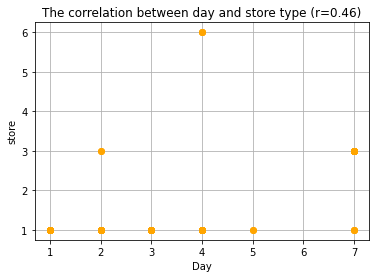

In [37]:
# Is there a correlation between day of the week & supermarket type?

# get the Pearson correlation between both variables
current_corr = round(data_corr["day_num"]["storetype_num"], 3)

# select the x and y features
x = df['day_num'] # select the x feature
y = df['storetype_num'] # select the y feature

# fit the points with the scatter function
plt.plot(x, y, 'o',color='orange');


# give the graph a title and labels
plt.xlabel("Day")
plt.ylabel('store')
plt.title(f"The correlation between day and store type (r={current_corr})")

# call the graph (show function)
plt.grid(True)
plt.show()

In [40]:
# Is there a correlation between day of the week & supermarket type? + TIME


import math

# Get pairwise correlation coefficients
cor = df.corr()

# Independent variables
x = 'day_num'
y = 'time_num'

# Dependent variable
z = 'storetype_num'

# Pairings
xz = cor.loc[ x, z ]
yz = cor.loc[ y, z ]
xy = cor.loc[ x, y ]

Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)) )
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(df) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )

print(f'Storetype is {R2_adj} percent dependent on day and time')

Storetype is 0.23227408231189417 percent dependent on day and time


In [41]:
# Is there a correlation between DAY + NAME + TIME

import math

# Get pairwise correlation coefficients
cor = df.corr()

# Independent variables
x = 'time_num'
y = 'storename_num'

# Dependent variable
z = 'day_num'

# Pairings
xz = cor.loc[ x, z ]
yz = cor.loc[ y, z ]
xy = cor.loc[ x, y ]

Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)) )
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(df) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )



## Time based off day and store
xt = 'day_num'
yt = 'storename_num'
zt = 'time_num'
xzt = cor.loc[ xt, zt]
yzt = cor.loc[ yt, zt ]
xyt = cor.loc[ xt, yt ]

Rxyzt = math.sqrt((abs(xzt**2) + abs(yzt**2) - 2*xzt*yzt*xyt) / (1-abs(xyt**2)) )
R2t = Rxyzt**2

nt = len(df) # Number of rows
kt = 2       # Number of independent variables
R2_adjt = 1 - ( ((1-R2t)*(n-1)) / (n-k-1) )



## Store based of day and time
xs = 'day_num'
ys = 'time_num'
zs = 'storename_num'
xzs = cor.loc[ xs, zs ]
yzs = cor.loc[ ys, zs ]
xys = cor.loc[ xs, ys ]

Rxyzs = math.sqrt((abs(xzs**2) + abs(yzs**2) - 2*xzs*yzs*xys) / (1-abs(xys**2)) )
R2s = Rxyzs**2

ns = len(df) # Number of rows
ks = 2       # Number of independent variables
R2_adjs = 1 - ( ((1-R2s)*(n-1)) / (n-k-1) )


print(f'Day is {R2_adj*100} percent dependent on time and store')
print(f'Time is {R2_adjt*100} percent dependent on day and store')
print(f'Storename is {R2_adjs*100} percent dependent on day and time')

Day is 44.57036736054343 percent dependent on time and store
Time is 54.21253651105741 percent dependent on day and store
Storename is 21.875127887660696 percent dependent on day and time
